# 2. Undersampling and Oversampling

In this notebook, I'll explore ways to help with our bad classifier predictions. While our accuracy was pretty high, our precision and recall weren't as good. As previously explained, this behaviour is expected because of our imbalanced dataset.

Some ways to help to prevent classifiers to generalise badly is to undersample and oversample our data and I'll explore what these concepts mean and how to use them properly.

Undersampling can be described as a way to reduce the imbalance in a dataset by removing data points from the classes that are in higher number in the dataset. Oversampling, meanwhile, is to produce more data points for the class that is in lower quantity in order to balance the dataset.

We can get a look at how it works here: https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

I'll be using Sklearn's implementation of undersampling and oversampling techniques.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from imblearn import over_sampling, under_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedShuffleSplit, train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer, confusion_matrix, average_precision_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import fraudutils as futils
from fraudutils import classify
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

I'll be loading the same data as before, but now I'll split it into train and test while maintaining its distribution and I'll apply oversampling and undersampling techniques and compare the results of simple ML algorithms, both in accuracy, precision and recall metrics.

After loading our dataset, I will be splitting it into train and test and then apply undersampling and oversampling techniques on the training set. This way we can use the new generated train set to train our algorithms and see how they perform on the test set.

In [2]:
cc_df = pd.read_csv('../../../data/raw/creditcard-fraud/creditcard.csv')
X_ = cc_df.drop(['Time', 'Class'], axis=1)
y_ = cc_df['Class'].values

# 60/30/10 separation

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.4, random_state=0, stratify=y_)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.25, random_state=0, stratify=y_test)

I'll be comparing classifiers the result of our classifiers applying undersampling and oversampling as shown bellow.

The metrics used below are accuracy, precision and recall, these are defined as:

$$Accuracy = \dfrac{TruePositive + TrueNegative}{TruePositive + FalsePositive + TrueNegative + FalseNegative}$$

$$Precision = \dfrac{TruePositive}{TruePositive + FalsePositive}$$

$$Recall = \dfrac{TruePositive}{TruePositive + TrueNegative}$$

In this analysis I'll be considering fraudulent examples as positives and non-fraudulents as negatives.

With the previous data split, we should have:


In [3]:
print("Train Data:")
print("Non-fraudulent: {}".format(len([x for x in y_train if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_train if x == 1])))

print("\nTest Data:")
print("Non-fraudulent: {}".format(len([x for x in y_test if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_test if x == 1])))

Train Data:
Non-fraudulent: 170589
Fraudulent: 295

Test Data:
Non-fraudulent: 85294
Fraudulent: 148


In [4]:
logistic_regression_scores = {}
decision_tree_scores = {}
naive_bayes_scores = {}
knn_scores = {}

## No sampling applied

Logistic regression results:
Mean accuracy: 0.9991690269422532
Mean precision: 0.8666666666666667
Mean recall: 0.6148648648648649
AUPRC: 0.5335500020982572
AUROC: 0.8073503633537165


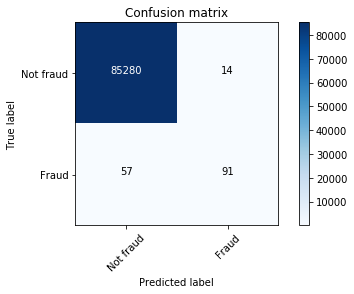

Decision tree results:
Mean accuracy: 0.9992509538634395
Mean precision: 0.8043478260869565
Mean recall: 0.75
AUPRC: 0.6036939118629164
AUROC: 0.8748417239196191


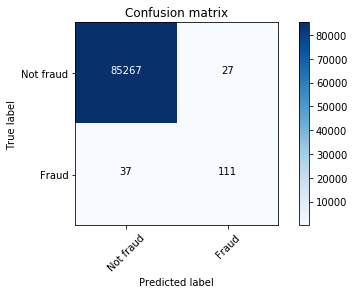

Naive Bayes results:
Mean accuracy: 0.9771657966807893
Mean precision: 0.06088650754992694
Mean recall: 0.8445945945945946
AUPRC: 0.05169360361573769
AUROC: 0.9109952127426979


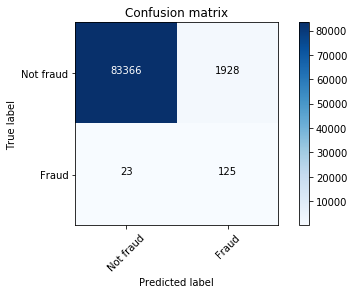

KNN results:
Mean accuracy: 0.9993094730928583
Mean precision: 0.9494949494949495
Mean recall: 0.6351351351351351
AUPRC: 0.6036896107353259
AUROC: 0.8175382571823118


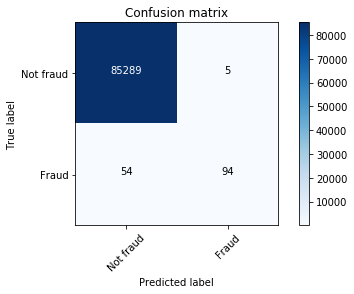

In [5]:
print("Logistic regression results:")
logistic_regression_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Oversampling: Random

In [6]:
ros = over_sampling.RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.9790384120221904
Mean precision: 0.07101827676240209
Mean recall: 0.918918918918919
AUPRC: 0.0654004842565962
AUROC: 0.94903082438548


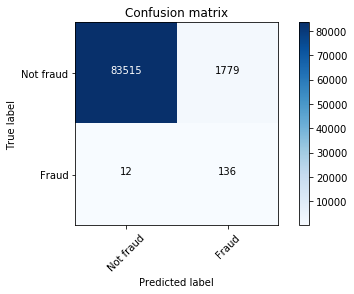

Decision tree results:
Mean accuracy: 0.9992158423257883
Mean precision: 0.813953488372093
Mean recall: 0.7094594594594594
AUPRC: 0.5779702672586081
AUROC: 0.8545890398805023


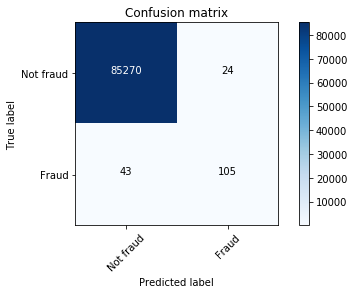

Naive Bayes results:
Mean accuracy: 0.9733152313850332
Mean precision: 0.05285234899328859
Mean recall: 0.8513513513513513
AUPRC: 0.045253403346972136
AUROC: 0.9124391056941998


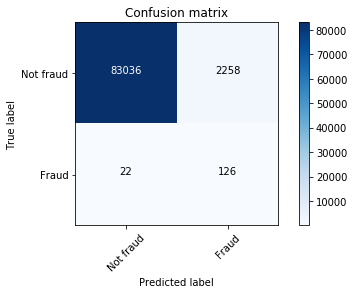

KNN results:
Mean accuracy: 0.9990871000210669
Mean precision: 0.7272727272727273
Mean recall: 0.7567567567567568
AUPRC: 0.5507898888203656
AUROC: 0.8781321711422305


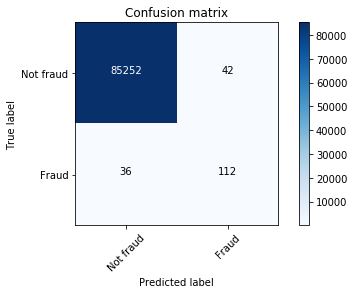

In [7]:
print("Logistic regression results:")
logistic_regression_scores['random_os'] = classify(X_oversampled,
                                                     X_test,
                                                     y_oversampled,
                                                     y_test,
                                                     classifier=LogisticRegression(),
                                                     normalized=False)
print("Decision tree results:")
decision_tree_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Oversampling: SMOTE

In [8]:
smote = over_sampling.SMOTE(random_state=0)
X_oversampled, y_oversampled = smote.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.9843285503616488
Mean precision: 0.09184372858122002
Mean recall: 0.9054054054054054
AUPRC: 0.08331966215239613
AUROC: 0.9449354506099411


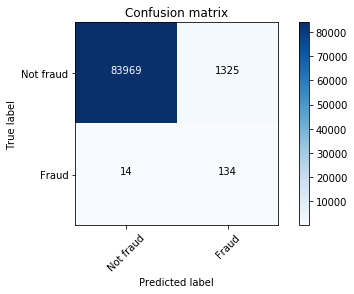

Decision tree results:
Mean accuracy: 0.997635823131481
Mean precision: 0.4035714285714286
Mean recall: 0.7635135135135135
AUPRC: 0.3085418739881709
AUROC: 0.8807777898892163


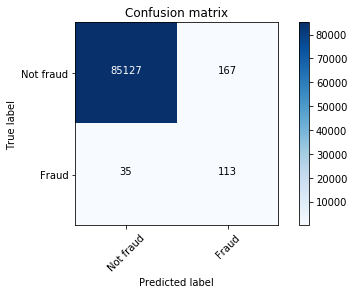

Naive Bayes results:
Mean accuracy: 0.9742632429016175
Mean precision: 0.05509761388286334
Mean recall: 0.8581081081081081
AUPRC: 0.0475254899738538
AUROC: 0.9162864502366695


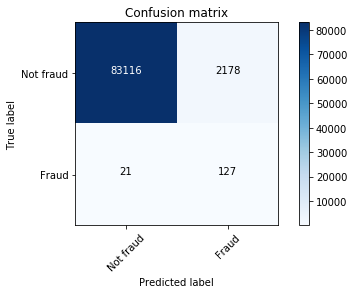

KNN results:
Mean accuracy: 0.9966409962313616
Mean precision: 0.32041343669250644
Mean recall: 0.8378378378378378
AUPRC: 0.2687353933138507
AUROC: 0.9173771926544688


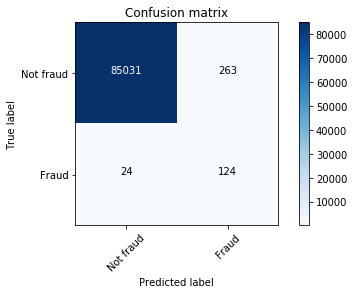

In [9]:
print("Logistic regression results:")
logistic_regression_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier(), normalized=False)


## Oversampling: ADASYN

In [10]:
adasyn = over_sampling.ADASYN(random_state=0)
X_oversampled, y_oversampled = adasyn.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.9530207626225978
Mean precision: 0.033091787439613524
Mean recall: 0.9256756756756757
AUPRC: 0.030761005002201417
AUROC: 0.9393719434021214


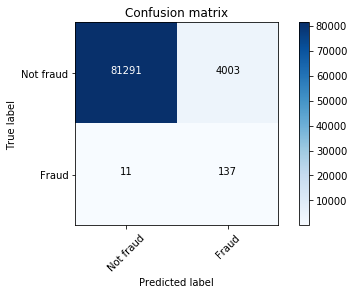

Decision tree results:
Mean accuracy: 0.9978230846656211
Mean precision: 0.4269230769230769
Mean recall: 0.75
AUPRC: 0.3206253499900067
AUROC: 0.8741265505193802


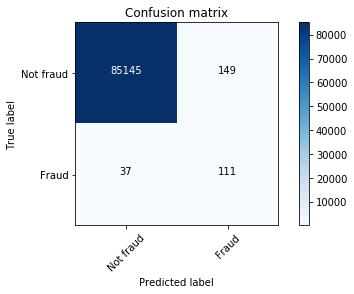

Naive Bayes results:
Mean accuracy: 0.9607453009058776
Mean precision: 0.03750721292556261
Mean recall: 0.8783783783783784
AUPRC: 0.03315619409295588
AUROC: 0.9196333001465836


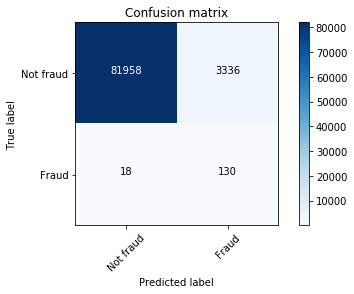

KNN results:
Mean accuracy: 0.9962196577795464
Mean precision: 0.29314420803782504
Mean recall: 0.8378378378378378
AUPRC: 0.24588820173830683
AUROC: 0.9171661578806278


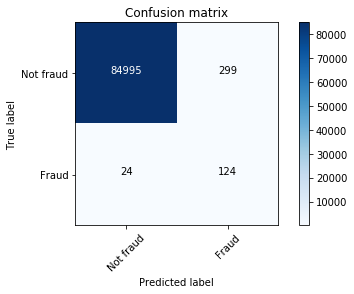

In [11]:
print("Logistic regression results:")
logistic_regression_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Undersampling: Random

In [12]:
rus = under_sampling.RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.9674516045972706
Mean precision: 0.046815834767642
Mean recall: 0.918918918918919
AUPRC: 0.04316040242357341
AUROC: 0.9432273681048506


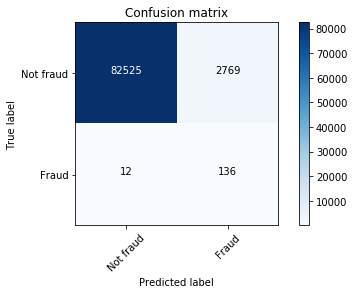

Decision tree results:
Mean accuracy: 0.892371433252967
Mean precision: 0.014904567874758738
Mean recall: 0.9391891891891891
AUPRC: 0.014103543630463712
AUROC: 0.9157396927257644


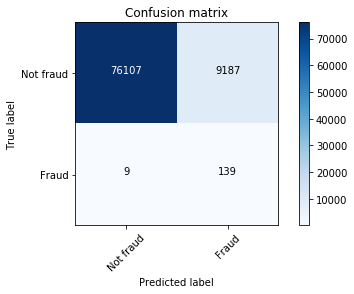

Naive Bayes results:
Mean accuracy: 0.9506097703705437
Mean precision: 0.02979214780600462
Mean recall: 0.8716216216216216
AUPRC: 0.02618985325405217
AUROC: 0.9111842251189683


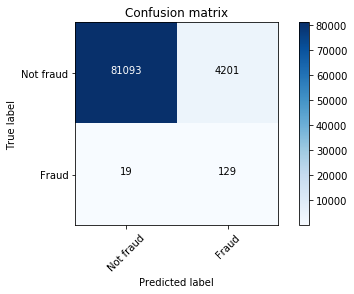

KNN results:
Mean accuracy: 0.9352309168792865
Mean precision: 0.022517730496453902
Mean recall: 0.8581081081081081
AUPRC: 0.019568427878759214
AUROC: 0.896736423271115


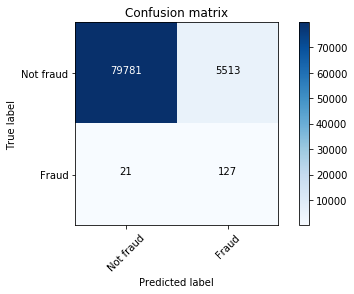

In [13]:
print("Logistic regression results:")
logistic_regression_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=LogisticRegression(), normalized=False)
print("Decision tree results:")
decision_tree_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=DecisionTreeClassifier(), normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=GaussianNB(), normalized=False)
print("KNN results:")
knn_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=KNeighborsClassifier(), normalized=False)

## Scores

### Logistic regression scores

In [14]:
logistic_regression_df = pd.DataFrame(logistic_regression_scores)
logistic_regression_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.533550,0.065400,0.083320,0.030761,0.043160
AUROC,0.807350,0.949031,0.944935,0.939372,0.943227
accuracy,0.999169,0.979038,0.984329,0.953021,0.967452
precision,0.866667,0.071018,0.091844,0.033092,0.046816
recall,0.614865,0.918919,0.905405,0.925676,0.918919


### Decision tree scores

In [15]:
decision_tree_df = pd.DataFrame(decision_tree_scores)
decision_tree_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.603694,0.577970,0.308542,0.320625,0.014104
AUROC,0.874842,0.854589,0.880778,0.874127,0.915740
accuracy,0.999251,0.999216,0.997636,0.997823,0.892371
precision,0.804348,0.813953,0.403571,0.426923,0.014905
recall,0.750000,0.709459,0.763514,0.750000,0.939189


### Naive Bayes scores

In [16]:
naive_bayes_df = pd.DataFrame(naive_bayes_scores)
naive_bayes_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.051694,0.045253,0.047525,0.033156,0.026190
AUROC,0.910995,0.912439,0.916286,0.919633,0.911184
accuracy,0.977166,0.973315,0.974263,0.960745,0.950610
precision,0.060887,0.052852,0.055098,0.037507,0.029792
recall,0.844595,0.851351,0.858108,0.878378,0.871622


### KNN scores

In [17]:
knn_df = pd.DataFrame(knn_scores)
knn_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.603690,0.550790,0.268735,0.245888,0.019568
AUROC,0.817538,0.878132,0.917377,0.917166,0.896736
accuracy,0.999309,0.999087,0.996641,0.996220,0.935231
precision,0.949495,0.727273,0.320413,0.293144,0.022518
recall,0.635135,0.756757,0.837838,0.837838,0.858108
